In [1]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ta
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from Utils import utils

warnings.filterwarnings('ignore')

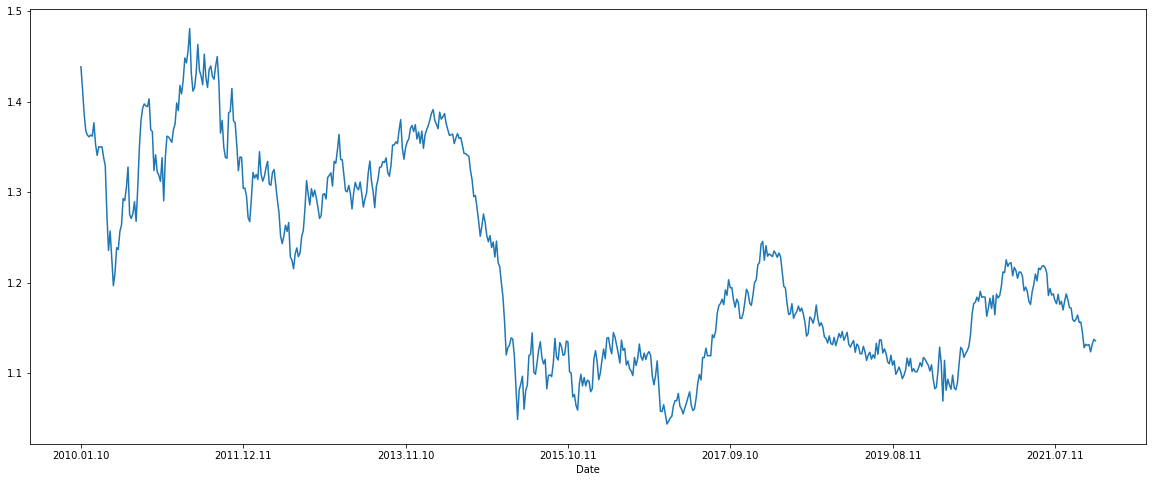

,Open,High,Low,Close,Volume,Median
Date,,,,,,
2010.01.10,1.44125,1.45785,1.43365,1.43857,229724,1.445750
2010.01.17,1.43480,1.44131,1.40285,1.41363,250323,1.422080
2010.01.24,1.41523,1.41938,1.38610,1.38611,252553,1.402740
2010.01.31,1.38627,1.40255,1.35854,1.36776,237535,1.380545
2010.02.07,1.36561,1.38380,1.35311,1.36309,249618,1.368455
...,...,...,...,...,...,...
2021.12.05,1.12995,1.13549,1.12274,1.13162,310002,1.129115
2021.12.12,1.13077,1.13602,1.12217,1.12372,316251,1.129095
2021.12.19,1.12356,1.13435,1.12341,1.13197,271002,1.128880


In [2]:
folder, ticker, period, startdatetime, enddatetime = 'CSVData', 'EURUSD', 'Weekly', '201001100000', '202201020000'
multiplier = 100 if 'JPY' in ticker else 10000
ohlcv = pd.read_csv(folder+'/'+ticker+'_'+period+'_'+startdatetime+'_'+enddatetime+'.csv', delimiter='\t')
ohlcv = utils.prep_metatrader_data(ohlcv)
pyplot.figure(figsize=(20,8))
ohlcv['Close'].plot()
pyplot.show()
ohlcv

In [12]:
label = 'Median'
n = 8
X = utils.timeseries_df(ohlcv, label, n)
y = ohlcv[[label]].iloc[n:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, shuffle=False)

In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression

#regr = MLPRegressor(hidden_layer_sizes=[500, 200], 
#                    max_iter=1000, n_iter_no_change=500, verbose=False)

#regr = HistGradientBoostingRegressor(max_iter=1000, loss='absolute_error')

regr = LinearRegression()

regr.fit(X_train, y_train.to_numpy().ravel())

predicted = regr.predict(X_test)

diff = predicted - y_test[label]
diff_df = pd.DataFrame({'Actual': y_test[label], 
                        'Predicted': predicted,
                        'Difference': diff})

mae = mean_absolute_error(predicted, y_test)
ohlcv_test = ohlcv[ohlcv.index.isin(X_test.index)]
ach = sum(abs(ohlcv_test['High']-ohlcv_test['Low']))/len(diff)
print('Mean absolute error: ' + str(round(mae*multiplier,2)) + ' pips')
print('Average candle range: ' + str(round(ach*multiplier,2)) + ' pips')

Mean absolute error: 55.26 pips
Average candle range: 160.75 pips


In [14]:
y_pred = pd.DataFrame(index = ohlcv_test.index)
y_pred['y_pred'] = predicted
y_pred['low'], y_pred['high'] = ohlcv_test['Low'], ohlcv_test['High']
y_pred['open'], y_pred['close'] = ohlcv_test['Open'], ohlcv_test['Close'] 
y_pred

,y_pred,low,high,open,close
Date,,,,,
2019.07.14,1.123736,1.11997,1.12838,1.12654,1.12194
2019.07.21,1.124678,1.11013,1.12252,1.12140,1.11270
2019.07.28,1.114167,1.10269,1.11620,1.11253,1.11050
2019.08.04,1.107983,1.11027,1.12495,1.11032,1.11998
2019.08.11,1.121342,1.10663,1.12306,1.11977,1.10893
2019.08.18,1.113553,1.10515,1.11531,1.10924,1.11386
2019.08.25,1.109754,1.09630,1.11639,1.11496,1.09893
2019.09.01,1.106178,1.09257,1.10846,1.09899,1.10245
2019.09.08,1.099859,1.09267,1.11094,1.10256,1.10697


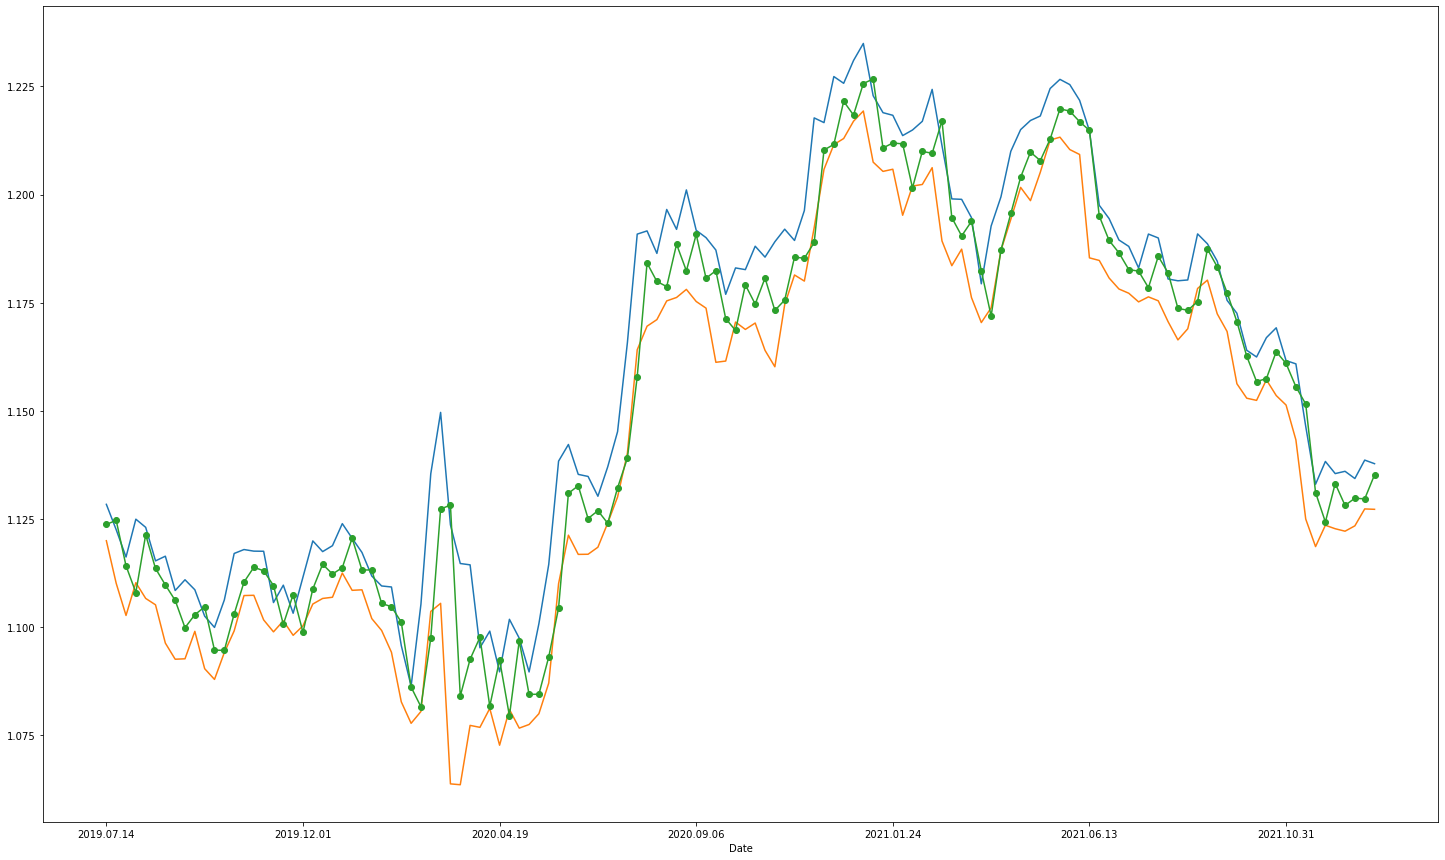

Hitrate: 76.15%
Number of candles: 130


In [15]:
y_pred, hitrate = utils.get_hitrate(y_pred)
pyplot.figure(figsize=(25,15))
y_pred['high'].plot()
y_pred['low'].plot()
y_pred['y_pred'].plot(marker = 'o')
pyplot.show()
print('Hitrate: ' + str(round(hitrate*100,2)) + '%')
print('Number of candles: ' + str(len(y_pred)))

In [16]:
y_pred, direction = utils.get_direction(y_pred)
y_pred, OR = utils.get_OR(y_pred)
y_pred, pips = utils.get_pips(y_pred, multiplier)
print('Direction: ' + str(round(direction*100,2)) + '%')
print('OR: ' + str(round(OR*100,2)) + '%')
print('Total pips: ' + str(round(pips,2)))

Direction: 60.77%
OR: 80.0%
Total pips: 652.99


In [9]:
sum(y_pred[y_pred['pips']>=0]['pips'])

1668.225252561489

In [10]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
y_pred

,y_pred,low,high,open,close,hit,direction,OR,pips
Date,,,,,,,,,
2019.07.14,1.130281,1.11997,1.12838,1.12654,1.12194,False,False,False,-46.000000
2019.07.21,1.122480,1.11013,1.12252,1.12140,1.11270,True,False,True,10.801573
2019.07.28,1.111177,1.10269,1.11620,1.11253,1.11050,True,True,True,13.528319
2019.08.04,1.113449,1.11027,1.12495,1.11032,1.11998,True,True,True,31.287056
2019.08.11,1.120384,1.10663,1.12306,1.11977,1.10893,True,False,True,6.143390
2019.08.18,1.108702,1.10515,1.11531,1.10924,1.11386,True,False,True,5.378280
2019.08.25,1.114792,1.09630,1.11639,1.11496,1.09893,True,True,True,1.681921
2019.09.01,1.101628,1.09257,1.10846,1.09899,1.10245,True,True,True,26.384148
2019.09.08,1.101110,1.09267,1.11094,1.10256,1.10697,True,False,True,14.497618
